In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## SKLEARN imports


In [2]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.shape

(891, 12)

In [5]:
for i in train_data.columns:
    if i in ["PassengerId", "Name"]:
        continue
    print(i)
    # print(train_data[i].value_counts())
    print(train_data[i].value_counts().sum(), train_data.shape[0])

Survived
891 891
Pclass
891 891
Sex
891 891
Age
714 891
SibSp
891 891
Parch
891 891
Ticket
891 891
Fare
891 891
Cabin
204 891
Embarked
889 891


In [6]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
# Not considering PassngerID and Name of the passenger and Ticket
# as we cannot draw a relation based on these attributes

# Removing Cabin attribute as it doesn't have enough 
# records and mostly populated with null

In [8]:
# replace 1 for male and 0 for female in Sex

train_data["Sex"].replace(["male", "female"], [1, 0], inplace = True)

In [9]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Age attribute has null values

print("Mean:", train_data["Age"].mean())
print("Median:", train_data["Age"].median())
print("Min:", train_data["Age"].min())
print("Max:", train_data["Age"].max())

Mean: 29.69911764705882
Median: 28.0
Min: 0.42
Max: 80.0


In [11]:
# replacing null values in Age with Median

train_data["Age"].replace(np.nan, (train_data["Age"].median()), inplace = True)
# train_data["Age"].astype(np.int32)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


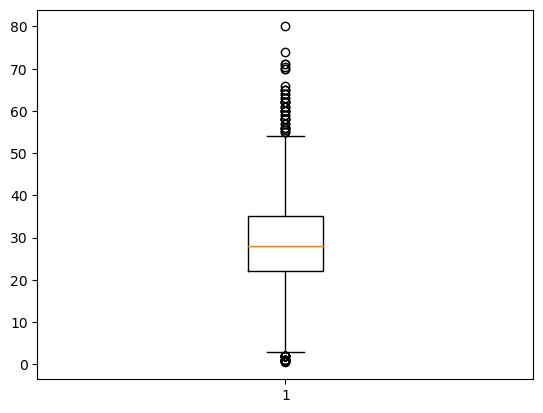

In [12]:
plt.boxplot(train_data["Age"])
plt.show()

In [13]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train_data["Embarked"].replace(np.nan, "S", inplace = True)

train_data["Embarked"].replace(["S", "C", "Q"], [1, -1, 0], inplace = True)

train_data["Embarked"].astype(np.int32)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,-1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1


In [15]:
train_data["Parch"].value_counts()


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [16]:
train_X = train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
train_Y = train_data["Survived"]

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(train_X, train_Y)

LogisticRegression()

In [17]:
y_pred = log.predict(
    train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]][800:])

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(train_data["Survived"][800: ], y_pred))
accuracy_score(train_data["Survived"][800: ], y_pred)


[[52  5]
 [ 8 26]]


0.8571428571428571

In [18]:
test = pd.read_csv("test.csv")

test["Embarked"].replace(np.nan, "S", inplace = True)
test["Age"].replace(np.nan, (train_data["Age"].median()), inplace = True)

test["Sex"].replace(["male", "female"], [1, 0], inplace = True)
test["Embarked"].replace(["S", "C", "Q"], [1, -1, 0], inplace = True)
test["Embarked"].astype(np.int32)

# test["Age"].astype(np.int32)

test["Fare"].replace(np.nan, train_data["Fare"].median(), inplace = True)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [46]:
test["Survived"] = log.predict(
    test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
)

In [48]:
test_res = test[["PassengerId", "Survived"]]

In [49]:
test_res.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [50]:
test_res.to_csv("test_res.csv", index=None)

In [24]:
from sklearn.tree import DecisionTreeClassifier

des = DecisionTreeClassifier()

des.fit(train_X, train_Y)

DecisionTreeClassifier()

In [25]:
test["Survived"] = des.predict( 
    test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

In [26]:
y_pred = des.predict(
    train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]][800:])

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(train_data["Survived"][800: ], y_pred))
accuracy_score(train_data["Survived"][800: ], y_pred)

[[57  0]
 [ 1 33]]


0.989010989010989

In [27]:
from sklearn.ensemble import RandomForestClassifier

rndm = RandomForestClassifier(n_estimators=10000, max_depth=15, random_state=1)

rndm.fit(train_X[:800], train_Y[:800])

RandomForestClassifier(max_depth=15, n_estimators=10000, random_state=1)

In [28]:
y_pred = rndm.predict(
    train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]][800:])

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(train_data["Survived"][800: ], y_pred))
accuracy_score(train_data["Survived"][800: ], y_pred)

[[51  6]
 [ 7 27]]


0.8571428571428571

In [47]:
test["Survived"] = knn.predict( 
    test[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])

c:\Users\reddy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(train_X[:870], train_Y[:870])

KNeighborsClassifier()

In [44]:
y_pred = rndm.predict(train_X[870: ])

from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(train_data["Survived"][870: ], y_pred))
accuracy_score(train_data["Survived"][870: ], y_pred)

[[13  1]
 [ 1  6]]


0.9047619047619048